<a href="https://colab.research.google.com/github/imavgg/statistics_pandas/blob/main/%E6%87%89%E7%94%A8%E7%B5%B1%E8%A8%882022_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **應用統計**

# **載入套件**

In [ ]:
import numpy as np
import pandas as pd
import random

# **資料輸入**

## **從PC端載入雲端**

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
data=pd.read_csv('statistics.csv',header=0)
data.head()

FileNotFoundError: ignored

## **雲端直接載入：先將資料上傳雲端硬碟**

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive') # 此處需要登入google帳號
# 點選同意；或複製授權碼


Mounted at /content/gdrive


In [ ]:
#匯入檔案
import pandas as pd
data= pd.read_csv("/content/gdrive/My Drive/statistics.csv", header=0)

# **觀察資料：欄位筆數**

In [ ]:
dm=data
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   編號        50 non-null     int64  
 1   購買與否      50 non-null     int64  
 2   性別        50 non-null     int64  
 3   世代        50 non-null     int64  
 4   上網次數      50 non-null     int64  
 5   區域        49 non-null     float64
 6   轉換率       49 non-null     float64
 7   每天平均上網時間  50 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 3.2 KB


In [ ]:
# data[['區域']]=data[['區域']].astype(int)
# data.info()

# **空值處理**

In [ ]:
#檢查空值欄位
print(dm[dm.區域.isnull()])

    編號  購買與否  性別  世代  上網次數  區域       轉換率  每天平均上網時間
48  49     0   1   1     3 NaN  0.747647  3.564974


In [ ]:
print(dm.isnull().sum())

編號          0
購買與否        0
性別          0
世代          0
上網次數        0
區域          1
轉換率         1
每天平均上網時間    0
dtype: int64


In [ ]:
print(dm[dm.轉換率.isnull()])

    編號  購買與否  性別  世代  上網次數   區域  轉換率  每天平均上網時間
49  50     1   0   1     4  1.0  NaN  7.675997


**bold text**## **刪除法**

In [ ]:
dm1=dm
result_drop=pd.DataFrame(dm1.dropna())
dm1drop=pd.DataFrame(result_drop)

In [ ]:
dm1drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   編號        48 non-null     int64  
 1   購買與否      48 non-null     int64  
 2   性別        48 non-null     int64  
 3   世代        48 non-null     int64  
 4   上網次數      48 non-null     int64  
 5   區域        48 non-null     float64
 6   轉換率       48 non-null     float64
 7   每天平均上網時間  48 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 3.4 KB


## **填補（天真）預測法**

### **類別資料：頻率高**

In [ ]:
dm2=dm
print(dm2.區域.value_counts())
dm2.區域 = dm2.區域.fillna(1)
dm3=pd.DataFrame(dm2)

1.0    21
2.0    10
3.0     9
4.0     5
5.0     4
Name: 區域, dtype: int64


In [ ]:
dm3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   編號        50 non-null     int64  
 1   購買與否      50 non-null     int64  
 2   性別        50 non-null     int64  
 3   世代        50 non-null     int64  
 4   上網次數      50 non-null     int64  
 5   區域        50 non-null     float64
 6   轉換率       49 non-null     float64
 7   每天平均上網時間  50 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 3.2 KB


### **數值資料：插補**

In [ ]:
dm3.轉換率 = dm3.轉換率.fillna((dm3['轉換率'].mean())) # median()
dm4=pd.DataFrame(dm3)
dm4

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
0,1,1,0,2,1,3.0,0.165831,3.583750
1,2,0,0,0,1,1.0,0.168575,0.531138
2,3,0,1,0,1,2.0,0.002128,7.107374
3,4,0,1,2,1,1.0,0.483369,3.510491
4,5,1,0,0,1,3.0,0.118572,9.467697
5,6,1,1,2,1,1.0,0.040898,0.358764
6,7,0,0,1,2,1.0,0.088220,11.299496
7,8,0,0,0,2,2.0,0.120315,1.718199
8,9,0,0,1,2,1.0,0.052611,0.438692
9,10,0,0,1,3,2.0,0.001756,22.963148


In [ ]:
dm4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   編號        50 non-null     int64  
 1   購買與否      50 non-null     int64  
 2   性別        50 non-null     int64  
 3   世代        50 non-null     int64  
 4   上網次數      50 non-null     int64  
 5   區域        50 non-null     float64
 6   轉換率       50 non-null     float64
 7   每天平均上網時間  50 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 3.2 KB


# **離群值：Y不平衡處理**

In [ ]:
#['購買與否','性別','世代','區域','上網次數','每天平均上網時間','轉換率']
cols = ['購買與否']

In [ ]:
from collections import Counter
import pandas as pd
result = data[cols].apply(pd.value_counts)
print(result)

           上網次數  每天平均上網時間  轉換率
0.001756    NaN       NaN  1.0
0.002128    NaN       NaN  1.0
0.006281    NaN       NaN  1.0
0.010430    NaN       NaN  1.0
0.012286    NaN       NaN  1.0
...         ...       ...  ...
6.000000    2.0       NaN  NaN
7.000000    1.0       NaN  NaN
8.000000    1.0       NaN  NaN
9.000000    1.0       NaN  NaN
10.000000   1.0       NaN  NaN

[110 rows x 3 columns]


In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download


import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-03-16 00:24:40--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 64.233.189.101, 64.233.189.139, 64.233.189.100, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s69g5k3uqlcr5lr7fn6du7evi21pdm77/1647390225000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-03-16 00:24:41--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s69g5k3uqlcr5lr7fn6du7evi21pdm77/1647390225000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.251.8.132|:

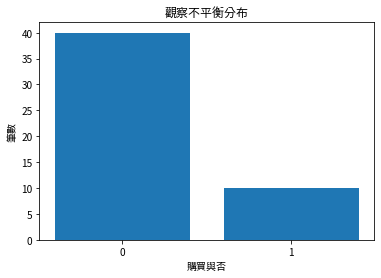

In [ ]:
plt.title('觀察不平衡分布')
plt.xlabel('購買與否')
plt.ylabel('筆數')
plt.bar(['0','1'], data['購買與否'].value_counts())
plt.show()

## **抽樣**

In [ ]:
# data['購買與否'].iloc[1]
df1=pd.DataFrame(data[data['購買與否']==1])
df1

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
0,1,1,0,2,1,3.0,0.165831,3.583750
4,5,1,0,0,1,3.0,0.118572,9.467697
5,6,1,1,2,1,1.0,0.040898,0.358764
10,11,1,1,1,3,5.0,0.400540,26.010522
18,19,1,0,1,6,5.0,0.164534,32.554037
21,22,1,1,0,8,1.0,0.302236,39.564254
28,29,1,0,1,2,1.0,0.198549,0.855206
35,36,1,0,1,4,1.0,0.087930,4.344833
45,46,1,1,1,1,3.0,0.010430,1.270942
49,50,1,0,1,4,1.0,0.260084,7.675997


In [ ]:
df2 = df1.sample(n=30, replace=True)
df2

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
21,22,1,1,0,8,1.0,0.302236,39.564254
0,1,1,0,2,1,3.0,0.165831,3.583750
4,5,1,0,0,1,3.0,0.118572,9.467697
45,46,1,1,1,1,3.0,0.010430,1.270942
18,19,1,0,1,6,5.0,0.164534,32.554037
21,22,1,1,0,8,1.0,0.302236,39.564254
21,22,1,1,0,8,1.0,0.302236,39.564254
0,1,1,0,2,1,3.0,0.165831,3.583750
4,5,1,0,0,1,3.0,0.118572,9.467697
21,22,1,1,0,8,1.0,0.302236,39.564254


In [ ]:
ds=pd.concat([df2,data])
ds

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
21,22,1,1,0,8,1.0,0.302236,39.564254
0,1,1,0,2,1,3.0,0.165831,3.583750
4,5,1,0,0,1,3.0,0.118572,9.467697
45,46,1,1,1,1,3.0,0.010430,1.270942
18,19,1,0,1,6,5.0,0.164534,32.554037
...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,3.0,0.010430,1.270942
46,47,0,0,1,2,1.0,0.128306,4.240454
47,48,0,0,0,2,2.0,0.068182,13.866900
48,49,0,1,1,3,1.0,0.747647,3.564974


# **敘述統計**

In [ ]:
def status(x) : 
    return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),
                      x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),
                      x.std(),x.skew(),x.kurt()],index=['總數','最小值','最小值位置','25%分位數',
                    '中位數','75%分位數','均值','最大值','最大值位數','平均絕對偏差','變異數','標準差','偏度','峰度'])

In [ ]:
#['購買與否','性別','世代','區域','上網次數','每天平均上網時間','轉換率']
cols=['上網次數','每天平均上網時間','轉換率']
Descriptivestatistics= pd.DataFrame(ds[cols].apply(status))
Descriptivestatistics

,上網次數,每天平均上網時間,轉換率
總數,80.000000,80.000000,80.000000
最小值,1.000000,0.358764,0.001756
最小值位置,0.000000,5.000000,9.000000
25%分位數,1.000000,1.841519,0.088148
中位數,2.500000,7.053230,0.165831
75%分位數,4.000000,23.901720,0.302236
均值,3.162500,12.567073,0.231807
最大值,10.000000,46.860650,0.962135
最大值位數,23.000000,23.000000,22.000000
平均絕對偏差,1.857187,11.355432,0.157139


# **區間值修正**

## **單一欄位修正**

### **對數轉換（Log Transformation）**

In [ ]:
dm4.每天平均上網時間=np.log1p(dm4.每天平均上網時間)
dm5=pd.DataFrame(dm4)
dm5

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
0,1,1,0,2,1,3.0,0.165831,1.522517
1,2,0,0,0,1,1.0,0.168575,0.426011
2,3,0,1,0,1,2.0,0.002128,2.092774
3,4,0,1,2,1,1.0,0.483369,1.506406
4,5,1,0,0,1,3.0,0.118572,2.348294
5,6,1,1,2,1,1.0,0.040898,0.306576
6,7,0,0,1,2,1.0,0.088220,2.509558
7,8,0,0,0,2,2.0,0.120315,0.999970
8,9,0,0,1,2,1.0,0.052611,0.363734
9,10,0,0,1,3,2.0,0.001756,3.176517


### **平方根轉換（Square Root Transformation）**

In [ ]:
dm4.每天平均上網時間=dm4.每天平均上網時間**(1/2)
dm5=pd.DataFrame(dm4)
dm5

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
0,1,1,0,2,1,3.0,0.165831,1.233903
1,2,0,0,0,1,1.0,0.168575,0.652695
2,3,0,1,0,1,2.0,0.002128,1.446642
3,4,0,1,2,1,1.0,0.483369,1.227357
4,5,1,0,0,1,3.0,0.118572,1.532414
5,6,1,1,2,1,1.0,0.040898,0.553693
6,7,0,0,1,2,1.0,0.088220,1.584159
7,8,0,0,0,2,2.0,0.120315,0.999985
8,9,0,0,1,2,1.0,0.052611,0.603104
9,10,0,0,1,3,2.0,0.001756,1.782279


### **倒數轉換（Reciprocal Transformation）**

In [ ]:
dm4.每天平均上網時間=1/ dm4.每天平均上網時間
dm5=pd.DataFrame(dm4)
dm5

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
0,1,1,0,2,1,3.0,0.165831,0.810436
1,2,0,0,0,1,1.0,0.168575,1.532109
2,3,0,1,0,1,2.0,0.002128,0.691256
3,4,0,1,2,1,1.0,0.483369,0.814759
4,5,1,0,0,1,3.0,0.118572,0.652565
5,6,1,1,2,1,1.0,0.040898,1.806056
6,7,0,0,1,2,1.0,0.088220,0.631250
7,8,0,0,0,2,2.0,0.120315,1.000015
8,9,0,0,1,2,1.0,0.052611,1.658089
9,10,0,0,1,3,2.0,0.001756,0.561079


# **離群值處理**

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## **觀察資料**

In [ ]:
dm5.describe()

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,0.200000,0.500000,0.960000,3.100000,2.180000,0.260084,0.788526
std,14.57738,0.404061,0.505076,0.754848,2.178279,1.320019,0.254439,0.292266
min,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.001756,0.508441
25%,13.25000,0.000000,0.000000,0.000000,1.000000,1.000000,0.081447,0.584603
50%,25.50000,0.000000,0.500000,1.000000,3.000000,2.000000,0.165183,0.707811
75%,37.75000,0.000000,1.000000,1.750000,4.000000,3.000000,0.382594,0.811257
max,50.00000,1.000000,1.000000,2.000000,10.000000,5.000000,0.962135,1.806056


## **盒狀圖：找出離群值**

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')


--2022-03-17 03:47:50--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.125.101, 108.177.125.100, 108.177.125.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/atabb9891an3tmi1b85ilfcum14fgq1p/1647488850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-03-17 03:47:51--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/atabb9891an3tmi1b85ilfcum14fgq1p/1647488850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.251.8.1

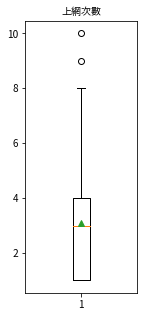

In [ ]:
plt.figure(figsize=(2,5))
plt.boxplot(dm5['上網次數'],showmeans=True)
plt.title('上網次數',fontproperties=myfont)
plt.show()

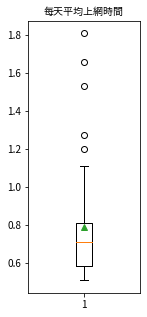

In [ ]:
plt.figure(figsize=(2,5))
plt.boxplot(dm5['每天平均上網時間'],showmeans=True)
plt.title('每天平均上網時間',fontproperties=myfont)
plt.show()

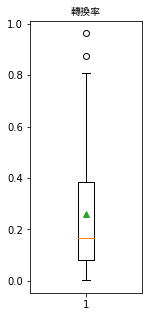

In [ ]:
plt.figure(figsize=(2,5))
plt.boxplot(dm5['轉換率'],showmeans=True)
plt.title('轉換率',fontproperties=myfont)
plt.show()

## **公式計算：找出離群值**

In [ ]:
maxoutlier=dm5['上網次數'] > dm5['上網次數'].mean() + 2 * dm5['上網次數'].std()
dm5[maxoutlier]

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
21,22,1,1,0,8,1.0,0.302236,0.519673
22,23,0,0,1,9,3.0,0.962135,0.532028
23,24,0,1,1,10,1.0,0.098676,0.508441


In [ ]:
minoutlier=dm5['上網次數'] < dm5['上網次數'].mean() - 2 * dm5['上網次數'].std()
dm5[minoutlier]

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間


## **刪除離群值**

In [ ]:
dm5[(maxoutlier | minoutlier)] 

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
21,22,1,1,0,8,1.0,0.302236,0.519673
22,23,0,0,1,9,3.0,0.962135,0.532028
23,24,0,1,1,10,1.0,0.098676,0.508441


In [ ]:
#刪除法
dm5.drop(index=[20,21,22,23])


,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
0,1,1,0,2,1,3.0,0.165831,0.810436
1,2,0,0,0,1,1.0,0.168575,1.532109
2,3,0,1,0,1,2.0,0.002128,0.691256
3,4,0,1,2,1,1.0,0.483369,0.814759
4,5,1,0,0,1,3.0,0.118572,0.652565
5,6,1,1,2,1,1.0,0.040898,1.806056
6,7,0,0,1,2,1.0,0.088220,0.631250
7,8,0,0,0,2,2.0,0.120315,1.000015
8,9,0,0,1,2,1.0,0.052611,1.658089
9,10,0,0,1,3,2.0,0.001756,0.561079


# **資料一般化**

## **類別資料轉換**

In [ ]:
freq = dm5['區域'].value_counts()
print(freq)

1.0    22
2.0    10
3.0     9
4.0     5
5.0     4
Name: 區域, dtype: int64


In [ ]:
# 為了方便比較新舊欄位，增加"上網次數區間"
columns = dm5.columns.tolist()
new_col = '區域區間'
dm5.columns.insert(8, new_col)

# 將 categorical 轉換成 categorical 欄位
labels = [f' {i}' for i in range(1, 3)]
dm5[new_col] = pd.cut(x=dm5.區域, bins=2, labels=labels)
freq = dm5[new_col].value_counts()
print(freq)

 1    41
 2     9
Name: 區域區間, dtype: int64


In [ ]:
dm6=pd.DataFrame(dm5)
dm6

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間,區域區間
0,1,1,0,2,1,3.0,0.165831,0.810436,1
1,2,0,0,0,1,1.0,0.168575,1.532109,1
2,3,0,1,0,1,2.0,0.002128,0.691256,1
3,4,0,1,2,1,1.0,0.483369,0.814759,1
4,5,1,0,0,1,3.0,0.118572,0.652565,1
5,6,1,1,2,1,1.0,0.040898,1.806056,1
6,7,0,0,1,2,1.0,0.088220,0.631250,1
7,8,0,0,0,2,2.0,0.120315,1.000015,1
8,9,0,0,1,2,1.0,0.052611,1.658089,1
9,10,0,0,1,3,2.0,0.001756,0.561079,1


## **連續資料轉換類別**

In [ ]:
# 為了方便比較新舊欄位，增加"上網次數區間"
columns = dm5.columns.tolist()
new_col = '上網次數區間'
dm5.columns.insert(9, new_col)

# 將 numerical 轉換成 categorical 欄位
labels = [f' {i}' for i in range(1, 4)]
dm5[new_col] = pd.cut(x=dm5.上網次數, bins=3, labels=labels)
freq = dm5[new_col].value_counts()
print(freq)

 1    40
 2     7
 3     3
Name: 上網次數區間, dtype: int64


In [ ]:
dm6=pd.DataFrame(dm5)
dm6

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間,區域區間,上網次數區間
0,1,1,0,2,1,3.0,0.165831,0.810436,1,1
1,2,0,0,0,1,1.0,0.168575,1.532109,1,1
2,3,0,1,0,1,2.0,0.002128,0.691256,1,1
3,4,0,1,2,1,1.0,0.483369,0.814759,1,1
4,5,1,0,0,1,3.0,0.118572,0.652565,1,1
5,6,1,1,2,1,1.0,0.040898,1.806056,1,1
6,7,0,0,1,2,1.0,0.088220,0.631250,1,1
7,8,0,0,0,2,2.0,0.120315,1.000015,1,1
8,9,0,0,1,2,1.0,0.052611,1.658089,1,1
9,10,0,0,1,3,2.0,0.001756,0.561079,1,1


## **相關係數**

In [ ]:
dm6.corr(method='pearson')  # kendall: spearman

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
編號,1.000000,-1.039438e-01,0.090085,0.077896,2.153058e-02,-0.247646,0.016887,-0.235477
購買與否,-0.103944,1.000000e+00,-0.100000,0.026764,-3.089122e-17,0.084178,-0.168976,0.141147
性別,0.090085,-1.000000e-01,1.000000,0.107058,1.205721e-01,-0.076526,0.101308,-0.199381
世代,0.077896,2.676439e-02,0.107058,1.000000,-4.716441e-02,-0.054071,0.062697,0.007290
上網次數,0.021531,-3.089122e-17,0.120572,-0.047164,1.000000e+00,0.036198,0.337363,-0.432602
區域,-0.247646,8.417820e-02,-0.076526,-0.054071,3.619767e-02,1.000000,0.216895,-0.199908
轉換率,0.016887,-1.689760e-01,0.101308,0.062697,3.373634e-01,0.216895,1.000000,-0.193888
每天平均上網時間,-0.235477,1.411475e-01,-0.199381,0.007290,-4.326018e-01,-0.199908,-0.193888,1.000000


In [ ]:
dm6.corr(method='pearson')['上網次數'].abs() >= 0.3


編號          False
購買與否        False
性別          False
世代          False
上網次數         True
區域          False
轉換率          True
每天平均上網時間     True
Name: 上網次數, dtype: bool

In [ ]:
dm6=dm5
columns = dm6.columns.tolist()
new_col = '上網次數與轉換共變'
dm6.columns.insert(10, new_col)
for i in range(dm6.shape[0]):
   dm6[new_col]=dm6.上網次數 * dm6.轉換率
dm6

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間,區域區間,上網次數區間,上網次數與轉換共變
0,1,1,0,2,1,3.0,0.165831,0.810436,1,1,0.165831
1,2,0,0,0,1,1.0,0.168575,1.532109,1,1,0.168575
2,3,0,1,0,1,2.0,0.002128,0.691256,1,1,0.002128
3,4,0,1,2,1,1.0,0.483369,0.814759,1,1,0.483369
4,5,1,0,0,1,3.0,0.118572,0.652565,1,1,0.118572
5,6,1,1,2,1,1.0,0.040898,1.806056,1,1,0.040898
6,7,0,0,1,2,1.0,0.088220,0.631250,1,1,0.176440
7,8,0,0,0,2,2.0,0.120315,1.000015,1,1,0.240629
8,9,0,0,1,2,1.0,0.052611,1.658089,1,1,0.105221
9,10,0,0,1,3,2.0,0.001756,0.561079,1,1,0.005267


# **判斷解釋力**

## **Y=類別 X=類別**

In [ ]:
!pip install scipy

In [ ]:
dm6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   編號         50 non-null     int64   
 1   購買與否       50 non-null     int64   
 2   性別         50 non-null     int64   
 3   世代         50 non-null     int64   
 4   上網次數       50 non-null     int64   
 5   區域         50 non-null     float64 
 6   轉換率        50 non-null     float64 
 7   每天平均上網時間   50 non-null     float64 
 8   區域區間       50 non-null     category
 9   上網次數區間     50 non-null     category
 10  上網次數與轉換共變  50 non-null     float64 
dtypes: category(2), float64(4), int64(5)
memory usage: 4.0 KB


In [ ]:
from scipy.stats import chi2_contingency 
import pandas as pd
import numpy as np
dm7=dm6
dm7=pd.DataFrame(dm7)
cross_tab = pd.pivot_table(data=dm7, values='編號', 
              index='購買與否', columns='性別', margins=True, aggfunc='count')
cross_tab

性別,0,1,All
購買與否,,,
0,19,21,40
1,6,4,10
All,25,25,50


In [ ]:
import scipy.stats
scipy.stats.chi2_contingency(cross_tab, correction = False)
# 檢定值、P值、自由度、檢測內容

(0.5, 0.9735009788392561, 4, array([[20., 20., 40.],
        [ 5.,  5., 10.],
        [25., 25., 50.]]))

In [ ]:
p_value = scipy.stats.chi2_contingency(cross_tab, correction = False)[1]
p_value

0.9735009788392561

## Y=類別 X=數值

In [ ]:
from scipy.stats import chi2_contingency 
import pandas as pd
import numpy as np
dm7=dm6
dm7=pd.DataFrame(dm7)
cross_tab = pd.pivot_table(data=dm7, values=None, 
              index='購買與否', columns=None, margins=True, aggfunc='mean')
cross_tab

,上網次數,上網次數與轉換共變,世代,區域,性別,每天平均上網時間,編號,轉換率
購買與否,,,,,,,,
0,3.1,1.068588,0.95,2.125,0.525,0.768107,26.25,0.281365
1,3.1,0.673161,1.00,2.400,0.400,0.870202,22.50,0.174961
All,3.1,0.989502,0.96,2.180,0.500,0.788526,25.50,0.260084


## Y=數值 X=數值  請參考上面相關分析

## Y=數值 X=類別  T檢定、Z檢定等，但數據大很容易顯著，故沒有實值意義